In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [27]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
print(df.isnull().sum())
print(df.describe())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mea

In [29]:
#data pre-processing
#Converting categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [30]:
# Select features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [38]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,True,False,False,False,True,False,False,False
93,7200,3,2,1,3,True,False,True,False,True,False,True,False
335,3816,2,1,1,2,True,False,True,False,True,False,False,False
412,2610,3,1,2,0,True,False,True,False,False,True,False,True
471,3750,3,1,2,0,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,True,False,False,False,True,False,False,True
106,5450,4,2,1,0,True,False,True,False,True,True,True,False
270,4500,3,2,3,1,True,False,False,True,False,False,False,False
435,4040,2,1,1,0,True,False,False,False,False,False,False,True


In [34]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 1754318687330.6643
R-squared: 0.6529242642153184


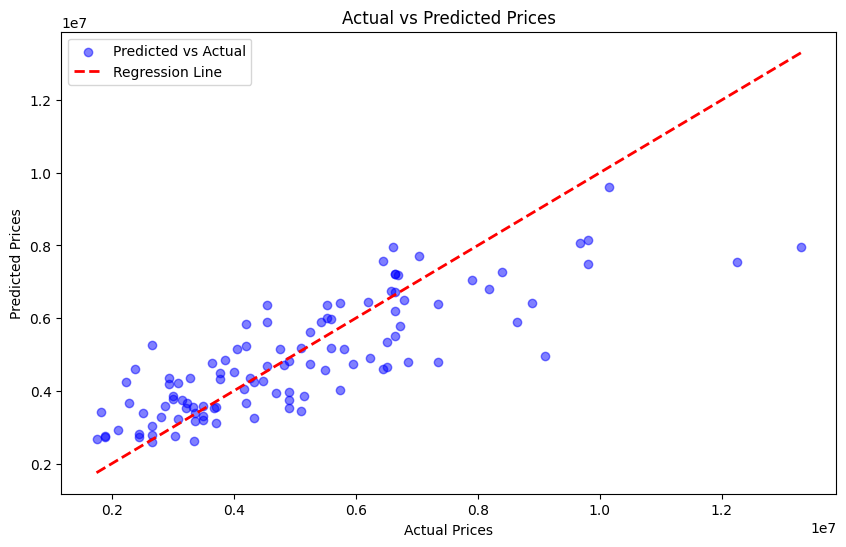

In [35]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Predicted vs Actual', color='blue', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Plot the regression line
min_y = min(y_test)
max_y = max(y_test)
plt.plot([min_y, max_y], [min_y, max_y], color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

In [36]:
import joblib
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)

print(f'Model saved to {model_filename}')

# loaded_model = joblib.load(model_filename)

# # Verify by making predictions with the loaded model
# y_pred_loaded = loaded_model.predict(X_test)
# print(f'Predictions with loaded model: {y_pred_loaded[:5]}')

Model saved to linear_regression_model.pkl


In [53]:

# Load the trained model from the file
model_filename = 'linear_regression_model.joblib'
model = joblib.load(model_filename)

# Function to collect dynamic input from the user
def get_user_input():
    print("Enter the details for prediction:")
    area = float(input("Area (in square feet): "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    mainroad = int(input("Main road (1 for Yes, 0 for No): "))
    guestroom = int(input("Guestroom (1 for Yes, 0 for No): "))
    basement = int(input("Basement (1 for Yes, 0 for No): "))
    hotwaterheating = int(input("Hot water heating (1 for Yes, 0 for No): "))
    airconditioning = int(input("Air conditioning (1 for Yes, 0 for No): "))
    parking = int(input("Number of parking spaces: "))
    prefarea = int(input("Preferred area (1 for Yes, 0 for No): "))
    furnishingstatus = input("Furnishing status (semi-furnished, unfurnished): ")

    return {
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'mainroad': [mainroad],
        'guestroom': [guestroom],
        'basement': [basement],
        'hotwaterheating': [True if hotwaterheating == 1 else False],
        'airconditioning': [airconditioning],
        'parking': [parking],
        'prefarea': [prefarea],
        'furnishingstatus_semi-furnished': [1 if furnishingstatus == 'semi-furnished' else 0],
        'furnishingstatus_unfurnished': [1 if furnishingstatus == 'unfurnished' else 0]
    }

# Collect input data from the user
input_data = get_user_input()

# Load training data to get column names
# This step assumes you have a dataset or method to retrieve the feature names.
# If not available, make sure to manually specify the feature names in the correct order.
# Here we'll assume the same CSV is used for consistency:
df_train = pd.read_csv('housing.csv')
df_train = pd.get_dummies(df_train, drop_first=True)
feature_names = df_train.columns.tolist()
feature_names = [col for col in df_train.columns if col != 'price']
# Ensure that the input data has the same columns
input_df = pd.DataFrame(input_data, columns=feature_names)
print(feature_names)

print(input_df)
input_df = input_df.fillna(1)
#Make predictions using the loaded model
predicted_price = model.predict(input_df)

# Display the predicted price
print(f'Predicted Price: ${predicted_price[0]:,.2f}')


Enter the details for prediction:
['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
    area  bedrooms  bathrooms  stories  parking mainroad_yes guestroom_yes  \
0  345.0         3          3        1        3          NaN           NaN   

  basement_yes hotwaterheating_yes airconditioning_yes prefarea_yes  \
0          NaN                 NaN                 NaN          NaN   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             1  
Predicted Price: $7,619,217.68
